# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [9]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=20_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=80 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/v2_malli_base_dev_stoch'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [11]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

train...
phase 1
batch 10 learning rate 0.0625 scaled 0.19764235376052372

training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 2060     |
| nupdates           | 1        |
| policy_entropy     | 1.22     |
| policy_loss        | -0.00437 |
| total_timesteps    | 16160    |
| value_loss         | 0.0195   |
---------------------------------


---------------------------------
| explained_variance | 0.711    |
| fps                | 2274     |
| nupdates           | 10       |
| policy_entropy     | 1.22     |
| policy_loss        | 2.01 

KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

n_pop 1000
Ave reward 224.27274983328397


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


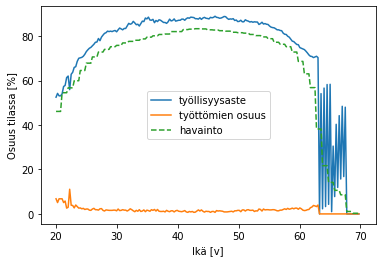

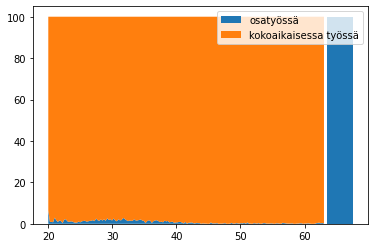

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


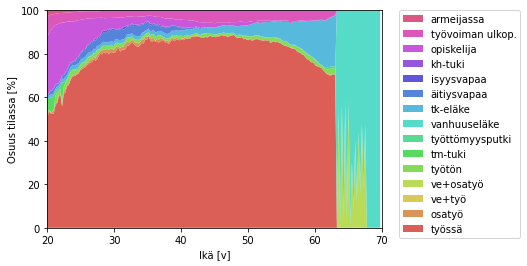

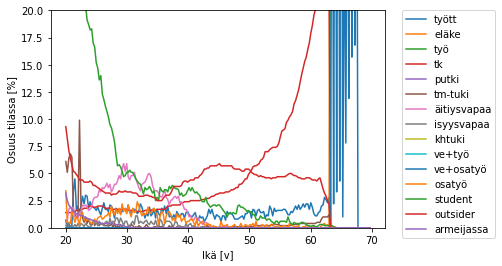

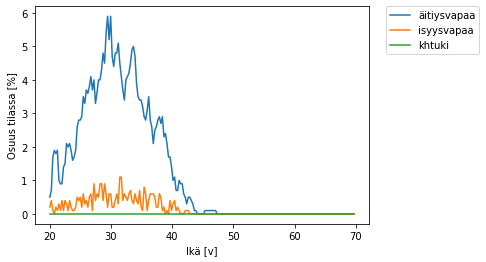

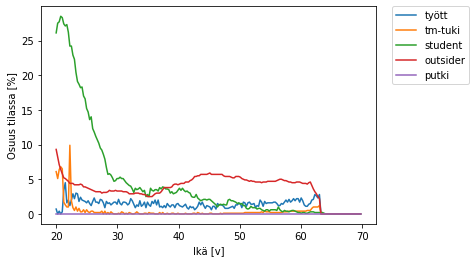

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


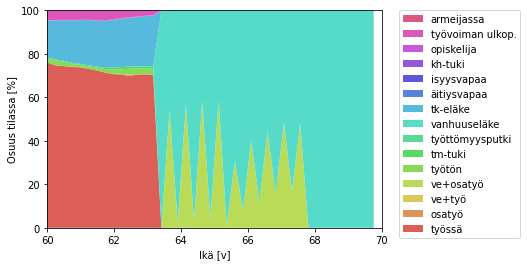

Rahavirrat skaalattuna väestötasolle
+------------------+-----------------------+----------------------+----------------------+
|                  |                   e/v |              toteuma |                  ero |
|------------------+-----------------------+----------------------+----------------------|
| palkkatulo       | 100,690,519,016.26    | 89,134,200,000.00    | 11,556,319,016.26    |
| etuusmeno        |  40,933,734,710.84    | 36,945,147,749.00    |  3,988,586,961.84    |
| verot+maksut     |  35,388,758,107.65    | 30,763,000,000.00    |  4,625,758,107.65    |
| muut tulot       |   5,544,976,603.19    |  6,182,147,749.00    |   -637,171,145.81    |
| valtionvero      |   3,719,190,170.87    |  5,542,000,000.00    | -1,822,809,829.13    |
| kunnallisvero    |  21,385,528,342.79    | 18,991,000,000.00    |  2,394,528,342.79    |
| ptel             |   6,280,538,555.84    |  5,560,000,000.00    |    720,538,555.84    |
| tyotvakmaksu     |   1,913,119,861.31    |  1,693,5

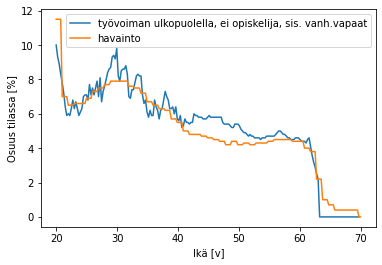

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.99 |      0.01 |       0.00 |      0.00 |        0.00 |
| 30-39 |     1.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 40-49 |     0.99 |      0.01 |       0.00 |      0.00 |        0.00 |
| 50-59 |     0.92 |      0.07 |       0.01 |      0.00 |        0.00 |
| 60-65 |     0.94 |      0.06 |       0.00 |      0.00 |        0.00 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     1.00 |     

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


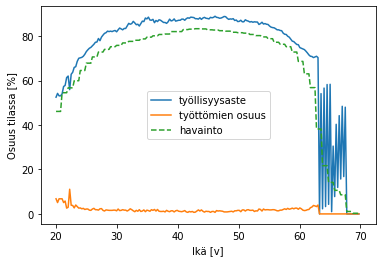

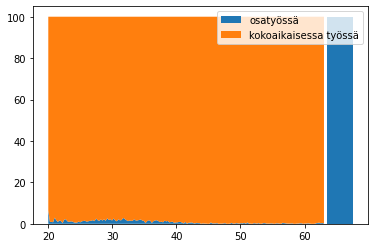

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


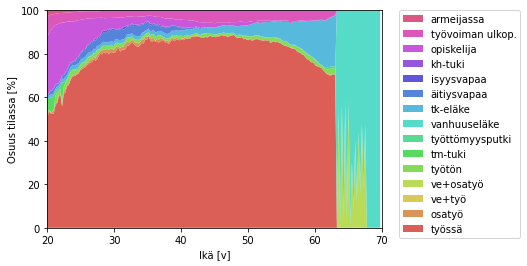

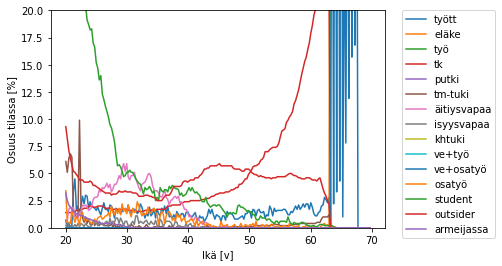

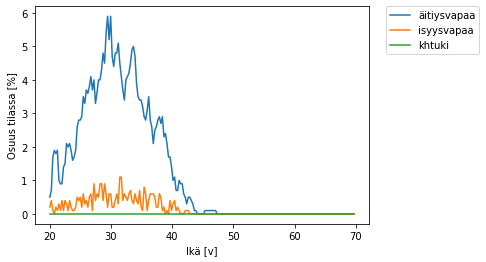

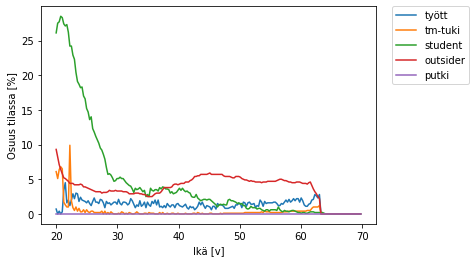

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


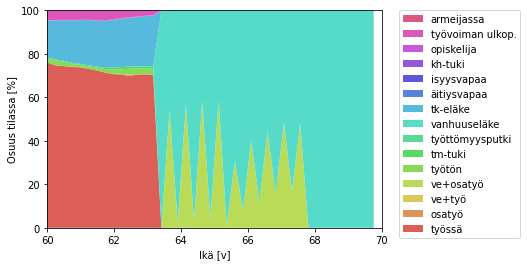

Lisäpäivillä on 0 henkilöä


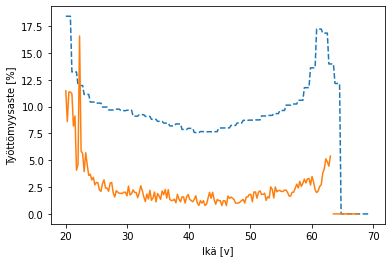

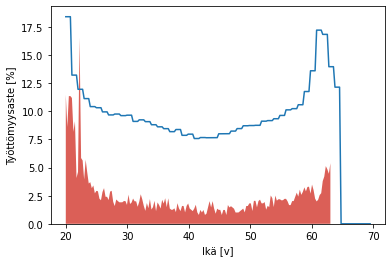

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


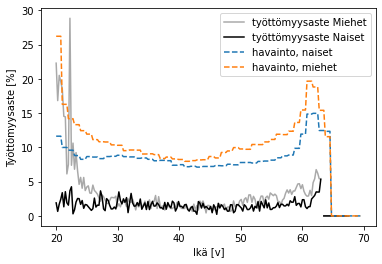

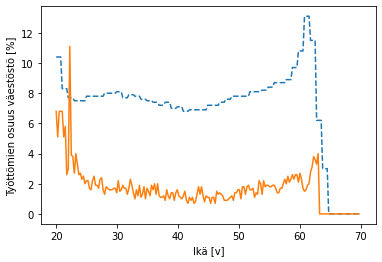

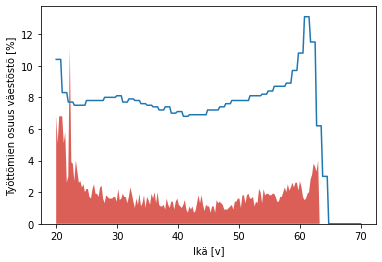

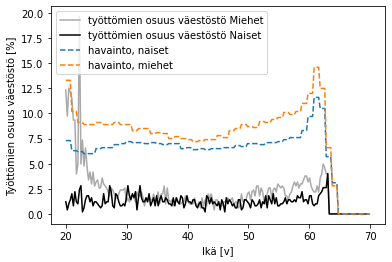

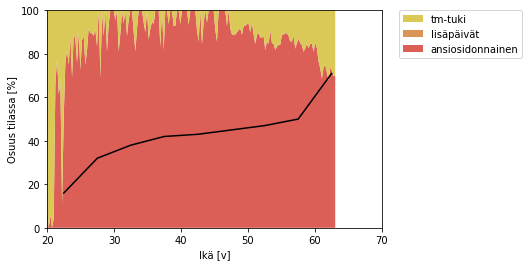

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


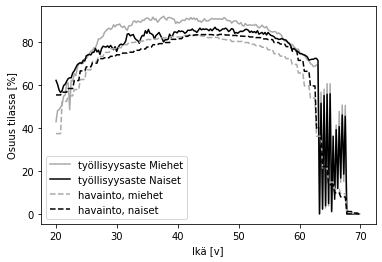

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


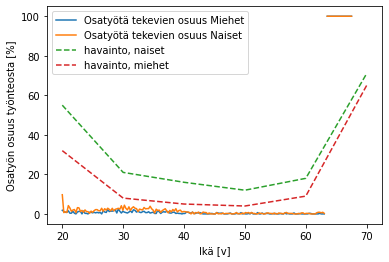

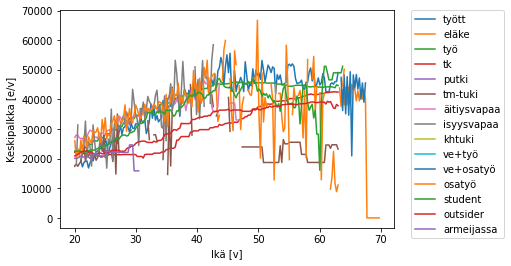

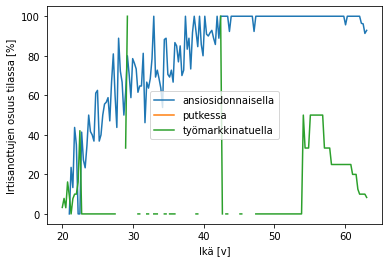

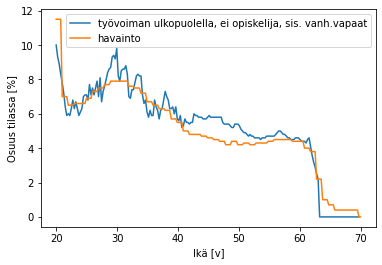

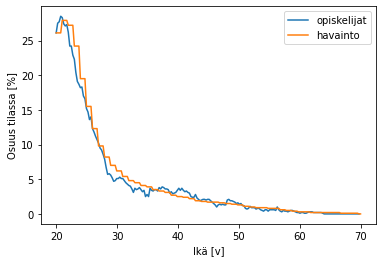

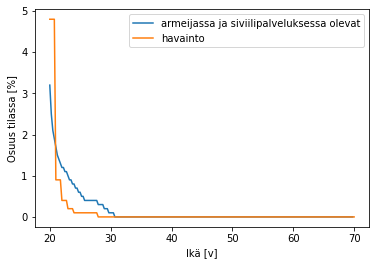

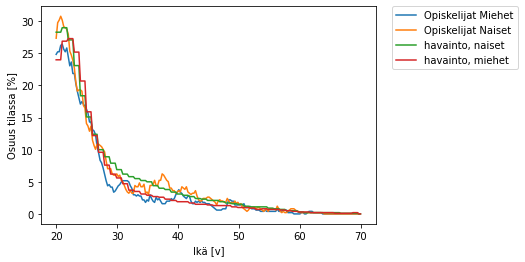

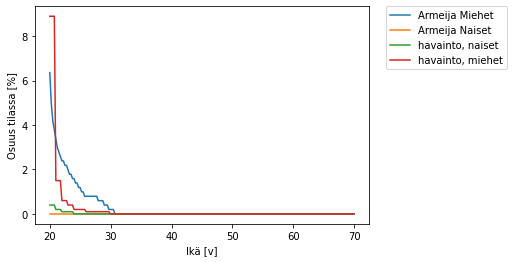

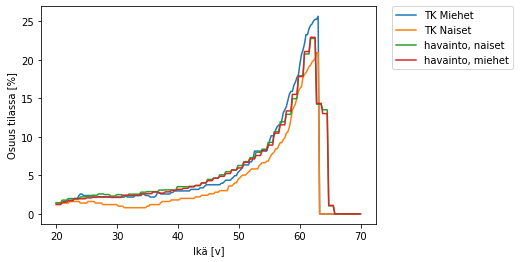

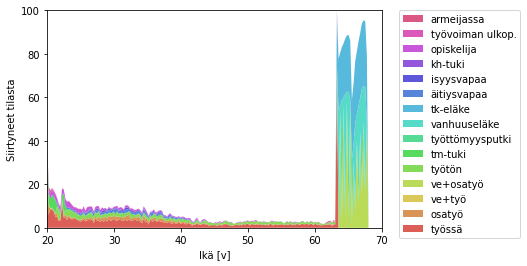

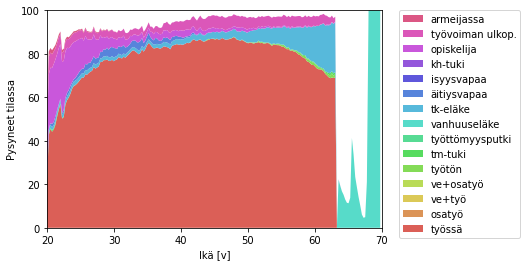

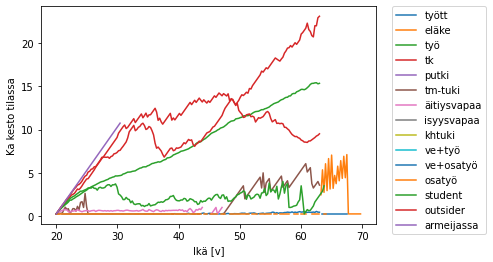

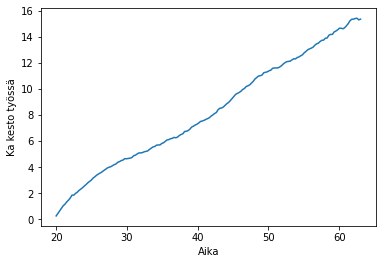

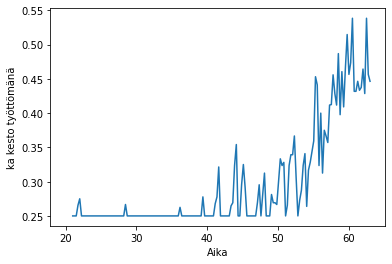

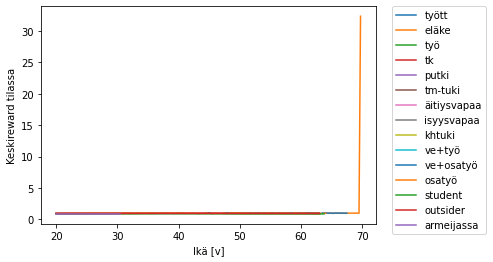

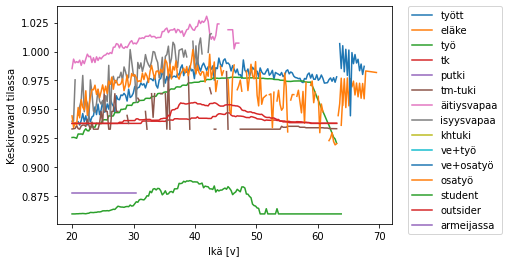

No handles with labels found to put in legend.


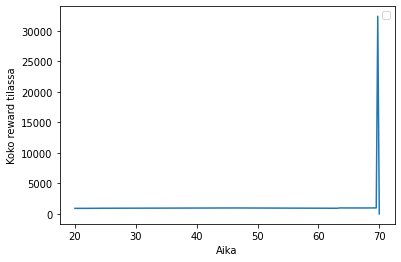

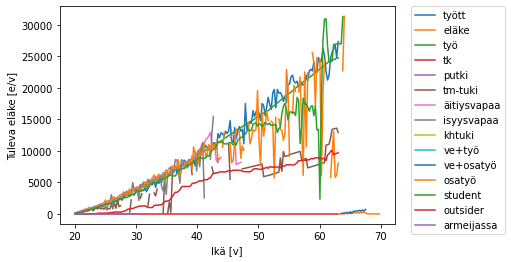

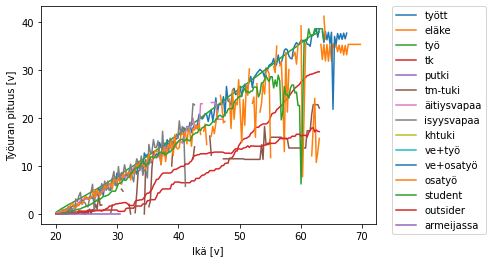

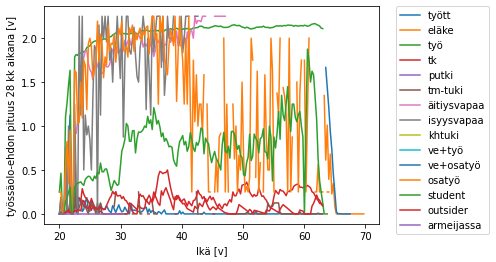

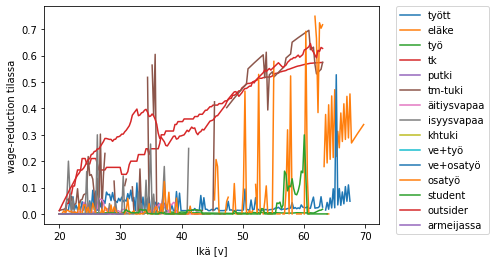

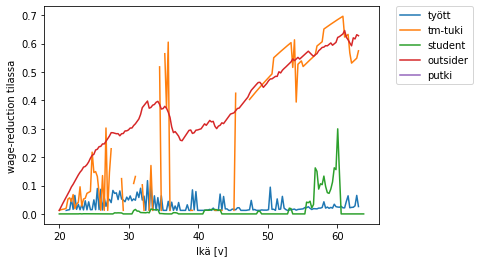

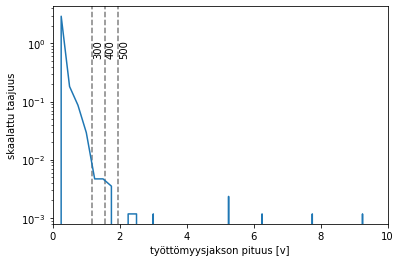

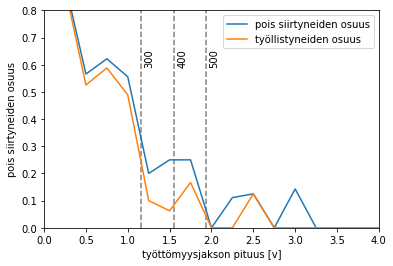

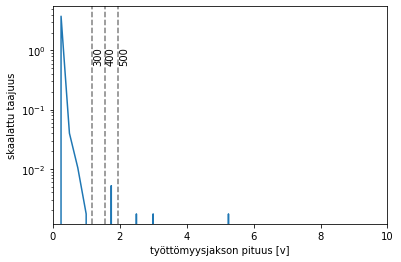

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


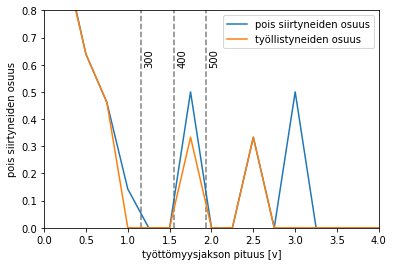

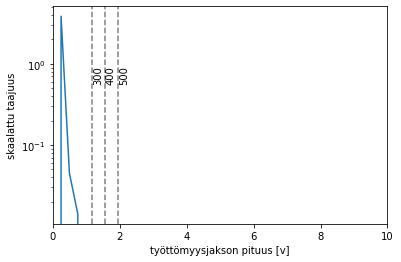

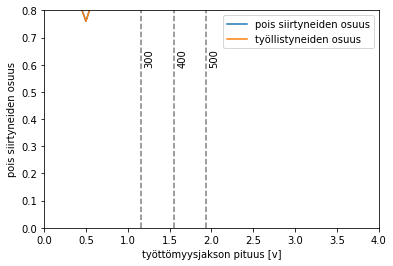

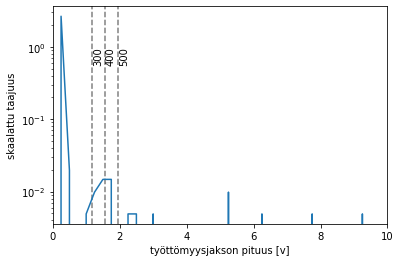

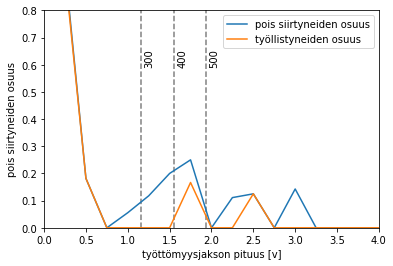

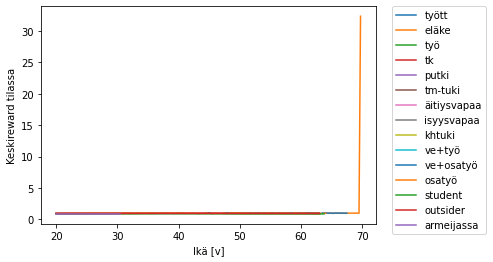

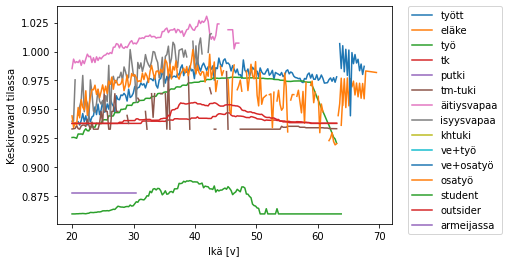

No handles with labels found to put in legend.


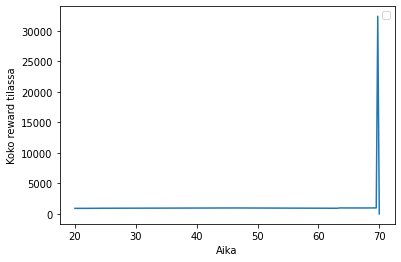

In [10]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.render(load=perusresults,figname='v2_')

In [7]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.env.unit_test_code_decode()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

pension: 13833.99670664402 vs 13833.996706644022
time_in_state: 0.7420907952352918 vs 0.742090795235292
old_wage: 9771.751596909706 vs 9771.751596909704
tyohist: 13.977615304370994 vs 13.977615304370993
pension: 2421.658485880771 vs 2421.658485880769
next_wage: 14367.425019975073 vs 14367.425019975071
pension: 2928.372840596669 vs 2928.3728405966685
old_wage: 6703.63238076602 vs 6703.632380766023
paid_pension: 13559.800353122942 vs 13559.80035312294


In [8]:
np.exp(-0.6)*1800

987.8609449692477